The Kaggle House Prices datasets can be downloaded [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/). 


In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


In [4]:
df = pd.read_csv('KeggleHousePrices_train.csv')
print(df.shape)

(1460, 81)


Our dataset has 1460 rows and 81 columns.

In [5]:
# Peek at the dateset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55


In [8]:
# drop columns with high missing values
df = df.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1)

In [9]:
# drop rows with any missing values
df.dropna(inplace=True)

In [10]:
# Check the dimension of the dataset
df.shape

(455, 76)

In [11]:
df['LogOfPrice'] = np.log(df.SalePrice)
df.drop(["SalePrice"], axis=1, inplace=True)

In [13]:
# set the target and predictors
y = df.LogOfPrice  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 
X = df_temp.drop(["LogOfPrice"],axis=1)  # predictors

In [14]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 3)

In [15]:
knn = KNeighborsRegressor()

# Hyperparameter tuning with GridSearchCV (searching for the best k value)
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [16]:
# Train the model with the best parameters
best_knn = grid_search.best_estimator_

# Predict on test set
y_pred = best_knn.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.20643151858211603
R2 Score: 0.6906440328319712


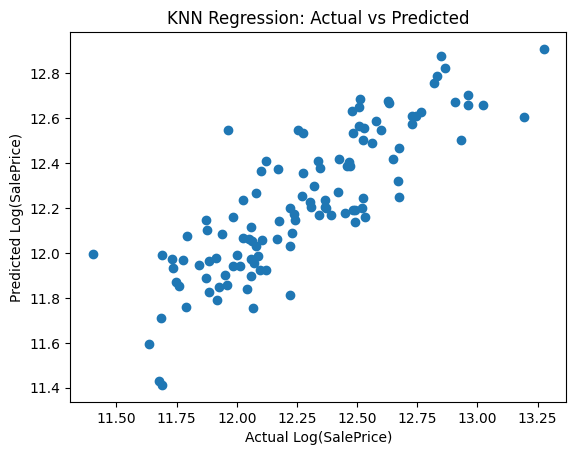

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Log(SalePrice)")
plt.ylabel("Predicted Log(SalePrice)")
plt.title("KNN Regression: Actual vs Predicted")
plt.show()

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict on test set
y_pred_lr = lr.predict(X_test)

In [21]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

Linear Regression Results:
RMSE: 0.1396746842246916
R2 Score: 0.8583743620607925


In [22]:
results = pd.DataFrame({
    'Model': ['KNN', 'Linear Regression'],
    'RMSE': [rmse, rmse_lr],
    'R2 Score': [r2, r2_lr]
})

print(results)

               Model      RMSE  R2 Score
0                KNN  0.206432  0.690644
1  Linear Regression  0.139675  0.858374
